<h1 style='margin:0'> Video Game Sales Analysis - Battle of the Titans</h1>

<p style='margin:0;font-size:1.92rem;padding:.5vh 0;line-height:2.88rem'>
    In this notebook, I will analyse historical sales from different video games and different platforms.
</p>
<p style='margin:0;font-size:1.92rem;padding:.5vh 0;line-height:2.88rem'>
    To conduct this analysis, I will use <a href='https://www.kaggle.com/gregorut/videogamesales'>Kaggle data</a> and the CRISP-DM process, which consists of:
</p>
<div style='margin:0;font-size:1.92rem;padding:.5vh 0;line-height:2.88rem'>
    <ol style='margin:0;font-size:1.92rem;line-height:2.88rem'>
        <li>
            <a href='#bu'><b>Busines Understanding</b></a> - understand what the business is about and what are the business problems or gaps to then <b>draw interesting/relevant questions</b>
        </li>
        <li>
            <a href='#du'><b>Data Understanding</b></a> - Take a broad look at the data to see which of the questions drawn above could be answered with the data
        </li>
        <div style='margin:0;font-size:1.92rem;padding:.5vh 0;line-height:2.88rem'>
            <ul>
                <li>
                    In my case, I will invert these steps, first looking at the data and then drawing interesting questions to be answered with the data
                </li>
            </ul>
        </div>
        <li>
            <a href="#dp"><b>Data Preparation</b></a> - Also known as <i>data wrangling</i>, will look for and clean these errors in the data:
            <div style='margin:0;font-size:1.92rem;padding:.5vh 0;line-height:2.88rem'>
            <ul>
                <li>
                    <b>Completeness</b> - missing or incomplete data
                </li>
                <li>
                    <b>Validity</b> - data that is not valid (example: the letter "a" for sales)
                </li>
                <li>
                    <b>Accuracy</b> - data that is valid, but rather impossible (example: negative number of units sold - it is a number, but it doesn't make sense)
                </li>
                <li>
                    <b>Consistency</b> - data is valid and could be accurate, but it doesn't make sense on the real world (example: positive sales number on a city that doesn't have any store)
                </li>
            </ul>
        </div>
        </li>
        <li>
            <b>Data Evaluation</b> - Here is where the analysis itself is conducted, where I'll be manipulating the data and creating visualizations to answer the questions drawn in step
        </li>
        <li>
            <b>Conclusions and presentation</b>
        </li>    
    </ol>
</div>

<p style='margin:0;font-size:1.92rem;padding:.5vh 0;line-height:2.88rem'>
    As I mentioned, I'll start with the Data Understanding (step 2 above), doing some basic exploratory analysis to see which variables and data I have on the dataset
</p>

<a id='du'></a>
<h1 style='margin:0'>Data Understanding</h1>

<h2 style='margin:0 0 0 30px'>Starting Notebook</h2>

In [2]:
# first will import the necessary libraries, and set some options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as pex
import plotly.graph_objects as go
from plotly.subplots import make_subplots as ms
import re, os, sys, math

# set width of notebook to ocupy almost the whole screen
from IPython.display import display, HTML
display(HTML('<style> .container {width: 92%} </style>'))

# set float and integer format display for pandas
pd.options.display.float_format = '{:,.4f}'.format
class _IntArrayFormatter(pd.io.formats.format.GenericArrayFormatter):

    def _format_strings(self):
        formatter = self.formatter or (lambda x: ' {:,}'.format(x))
        fmt_values = [formatter(x) for x in self.values]
        return fmt_values

pd.io.formats.format.IntArrayFormatter = _IntArrayFormatter

# set amount of rows and columns from a pandas' dataframe to be displayed inside the notebook
pd.options.display.max_rows=200
pd.options.display.max_columns=200

# set jupyter to ignore warnings
import warnings
warnings.filterwarnings("ignore")

c:\users\amori\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\amori\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\amori\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<h2 style='margin:0 0 0 30px'>Gathering and First Assessing of Data</h2>

In [3]:
# read the data downloaded previously from Kaggle into a pandas' dataframe
df = pd.read_csv('vgsales.csv')

In [4]:
# print the head of the dataframe to have a first look at it
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,"2,006.0000",Sports,Nintendo,41.4900,29.0200,3.7700,8.4600,82.7400
1,2,Super Mario Bros.,NES,"1,985.0000",Platform,Nintendo,29.0800,3.5800,6.8100,0.7700,40.2400
2,3,Mario Kart Wii,Wii,"2,008.0000",Racing,Nintendo,15.8500,12.8800,3.7900,3.3100,35.8200
3,4,Wii Sports Resort,Wii,"2,009.0000",Sports,Nintendo,15.7500,11.0100,3.2800,2.9600,33.0000
4,5,Pokemon Red/Pokemon Blue,GB,"1,996.0000",Role-Playing,Nintendo,11.2700,8.8900,10.2200,1.0000,31.3700


In [5]:
# look at the columns' names, types and non missing values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# use function to describe the numeric columns
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,"16,598.0000","16,327.0000","16,598.0000","16,598.0000","16,598.0000","16,598.0000","16,598.0000"
mean,"8,300.6053","2,006.4064",0.2647,0.1467,0.0778,0.0481,0.5374
std,"4,791.8539",5.8290,0.8167,0.5054,0.3093,0.1886,1.5550
min,1.0000,"1,980.0000",0.0000,0.0000,0.0000,0.0000,0.0100
25%,"4,151.2500","2,003.0000",0.0000,0.0000,0.0000,0.0000,0.0600
50%,"8,300.5000","2,007.0000",0.0800,0.0200,0.0000,0.0100,0.1700
75%,"12,449.7500","2,010.0000",0.2400,0.1100,0.0400,0.0400,0.4700
max,"16,600.0000","2,020.0000",41.4900,29.0200,10.2200,10.5700,82.7400


<p style='margin:0;font-size:1.92rem;padding:.5vh 0;'>
    I think looking at the data above I can start formulating some questions, so I can then move to a more focused data preparation.
</p>

<a id='bu'></a>
<h1 style='margin:0'>Business Understanding</h1>

<h2 style='margin:0 0 0 30px'>Questions:</h2>
<ul style='font-size:1.92rem; line-height:3.5vh; padding-left:4vw'>
    <li>
        What was the video game franchise with the most sucess? Were Nintendo franchises more successful than Xbox or Playstation franchises?
        <ul>
            <li>
                Here we can look into Sonic, Mario, EA Sports (various), Legends of Zelda, and exclusive titles for PlayStation and Xbox
            </li>
        </ul>
    </li>
    <li>
        What was the video game manufacturer with the most success? Looking specifically into Nintendo, Sony and Microsoft
    </li>
    <li>
        Were there preferences of console's manufacturer to play specific genres games? Or even within a manufacturer, were there platforms that had higher sales in a given genre?
    </li>

<a id='dp'></a>
<h1 style='margin:0'>Data Preparation</h1>

<h2 style='margin:0 0 0 30px'>Checking Missing Data</h2>

<AxesSubplot:>

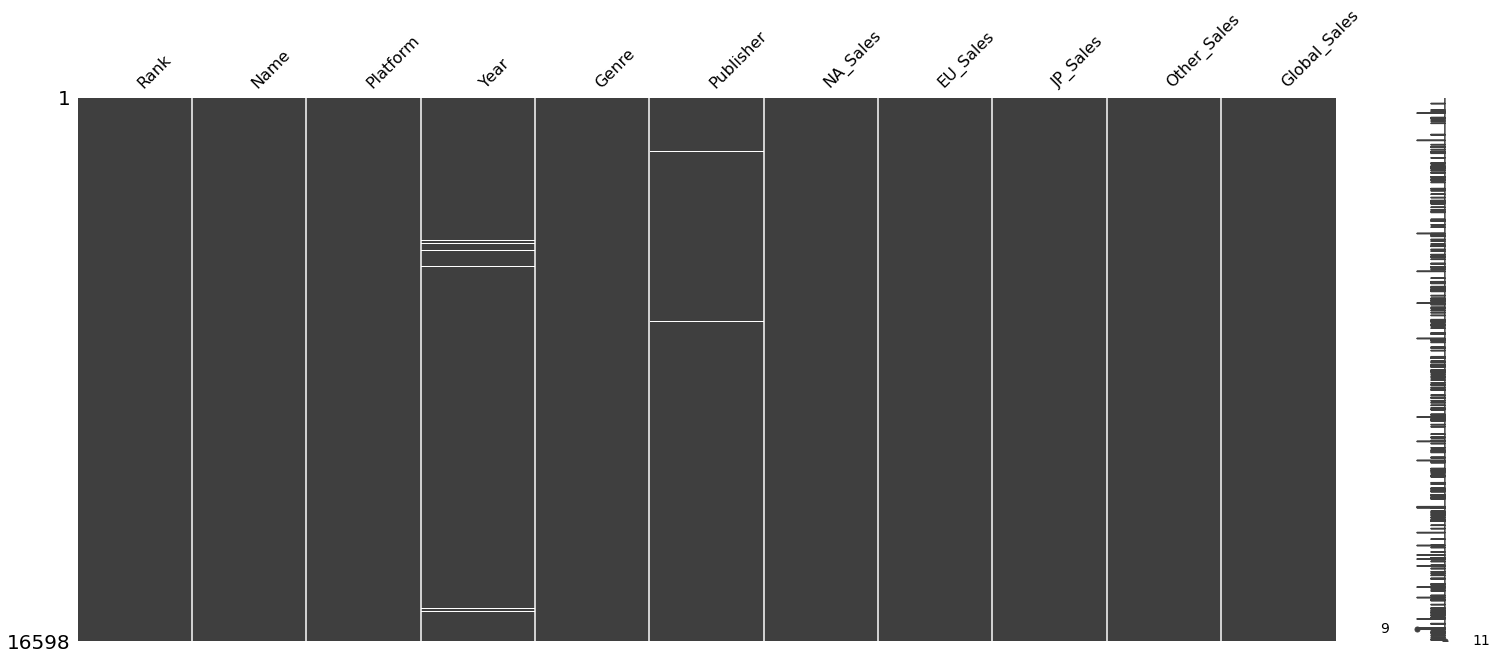

In [10]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

<AxesSubplot:>

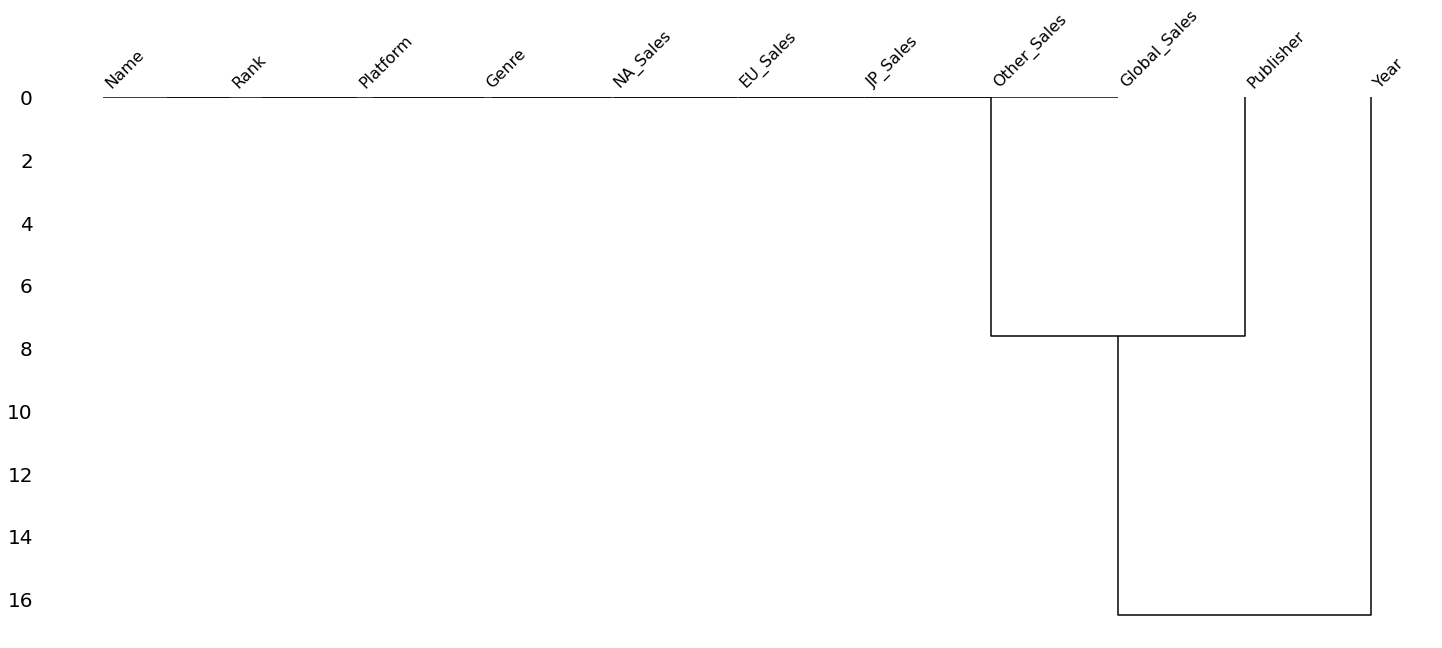

In [11]:
msno.dendrogram(df)

In [16]:
df.isnull().sum()/df.shape[0]

Rank           0.0000
Name           0.0000
Platform       0.0000
Year           0.0163
Genre          0.0000
Publisher      0.0035
NA_Sales       0.0000
EU_Sales       0.0000
JP_Sales       0.0000
Other_Sales    0.0000
Global_Sales   0.0000
dtype: float64

<p style='margin:0;font-size:1.92rem;padding:.5vh 3vw;line-height:2.8rem'>
    From both charts above and the percentage of nulls per column, there are just a few columns that have a few nans, so it'd easier to just drop those rows. But I'll also check for sales on those rows, because if it's high it could higly impact the analysis, even if it's just a few rows
</p>

In [58]:
df_nulls_sales = pd.concat([
    df[np.any(df.isnull(), axis=1)].iloc[:,-5:].sum(), 
    df.iloc[:,-5:].sum(),
    df.groupby('Year', as_index = False).agg({x:sum for x in df.columns if re.match(r'.*Sales.*', x)}).iloc[:,-5:].mean()], 
    axis = 1
).set_axis(['nulls', 'total_sum', 'total_avg'], axis = 1)

In [59]:
df_nulls_sales.loc[:, 'nulls_vs_total_sum'] = df_nulls_sales.nulls / df_nulls_sales.total_sum
df_nulls_sales.loc[:, 'nulls_vs_total_avg'] = df_nulls_sales.nulls / df_nulls_sales.total_avg
df_nulls_sales

,nulls,total_sum,total_avg,nulls_vs_total_sum,nulls_vs_total_avg
NA_Sales,65.3000,"4,392.9500",111.1136,0.0149,0.5877
EU_Sales,27.4400,"2,434.1300",61.7723,0.0113,0.4442
JP_Sales,6.7500,"1,291.0200",32.9308,0.0052,0.2050
Other_Sales,8.8400,797.7500,20.2310,0.0111,0.4370
Global_Sales,108.4700,"8,920.4400",226.1631,0.0122,0.4796


<p style='margin:0;font-size:1.92rem;padding:.5vh 3vw; line-height: 2.8rem'>
    From the results above, it seems that the sales of the rows that contain nulls are not relevant to the total. However, if they are concentrated in a year, it could do a big difference for that year (looking at the yearly average sales). So it would be best to try to fill those rows with information
</p>